In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# 1. Loading data
bottles = pd.read_csv("battles.csv")
character_deaths = pd.read_csv("character-deaths.csv")
character_predictions = pd.read_csv("character-predictions.csv")

In [3]:
# 2. Data preprocessing
#   2.1 Replace null values with 0
character_deaths["Death Year"].fillna(value=0, inplace=True)
character_deaths["Book of Death"].fillna(value=0, inplace=True)
character_deaths["Death Chapter"].fillna(value=0, inplace=True)
character_deaths["Book Intro Chapter"].fillna(value=0, inplace=True)
character_deaths

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,0.0,0.0,0.0,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [4]:
#   2.2 Convert the numeric value to 1
#   feature: Death Chapter
character_deaths["Death Chapter"] = character_deaths["Death Chapter"].apply(lambda x: 1 if x != 0 else 0)
character_deaths

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,0.0,0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,1,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,0.0,0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,1,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,0,0.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,0.0,0.0,0,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,1,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,1,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,1,73.0,1,0,0,0,1,0,0


In [5]:
#   2.3 Convert Allegiances to dummy features
character_deaths = pd.get_dummies(character_deaths, columns=["Allegiances"])
character_deaths

,Name,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,...,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_None,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,Addam Marbrand,0.0,0.0,0,56.0,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,Aegon Frey (Jinglebell),299.0,3.0,1,49.0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Aegon Targaryen,0.0,0.0,0,5.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adrack Humble,300.0,5.0,1,20.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aemon Costayne,0.0,0.0,0,0.0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,0.0,0.0,0,21.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
913,Yurkhaz zo Yunzak,300.0,5.0,1,47.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
914,Yezzan Zo Qaggaz,300.0,5.0,1,25.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
915,Torwynd the Tame,300.0,5.0,1,73.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [6]:
#   2.4 Split data into training set (75%) and test set (25%) randomly
character_name = character_deaths["Name"]
# train_set, test_set = train_test_split(character_deaths, test_size=0.25, random_state=42)
x_train, x_test, y_train, y_test, name_train, name_test = train_test_split(character_deaths.drop(["Death Chapter", "Name"], axis=1), 
    character_deaths["Death Chapter"], 
    character_name, 
    test_size=0.25, 
    random_state=42
)

In [7]:
# 3. Prediction using DecisionTreeClassifier from scikit-learn
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [8]:
feature_names = x_train.columns.tolist()
feature_names

['Death Year',
 'Book of Death',
 'Book Intro Chapter',
 'Gender',
 'Nobility',
 'GoT',
 'CoK',
 'SoS',
 'FfC',
 'DwD',
 'Allegiances_Arryn',
 'Allegiances_Baratheon',
 'Allegiances_Greyjoy',
 'Allegiances_House Arryn',
 'Allegiances_House Baratheon',
 'Allegiances_House Greyjoy',
 'Allegiances_House Lannister',
 'Allegiances_House Martell',
 'Allegiances_House Stark',
 'Allegiances_House Targaryen',
 'Allegiances_House Tully',
 'Allegiances_House Tyrell',
 'Allegiances_Lannister',
 'Allegiances_Martell',
 "Allegiances_Night's Watch",
 'Allegiances_None',
 'Allegiances_Stark',
 'Allegiances_Targaryen',
 'Allegiances_Tully',
 'Allegiances_Tyrell',
 'Allegiances_Wildling']

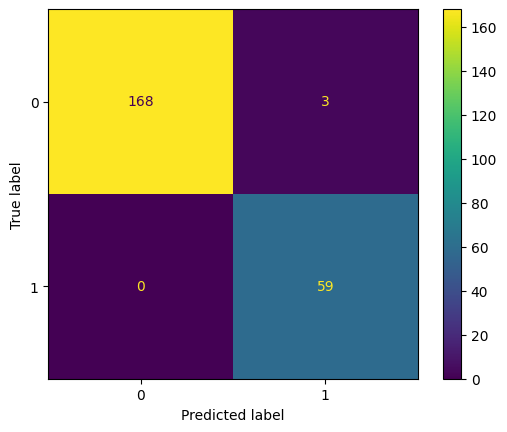

In [9]:
# 4. Create a confusion matrix and calculate Precision, Recall, and Accuracy
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [10]:
print ("Precision: ", precision_score(y_test, predictions, average=None))
print ("Recall: ", recall_score(y_test, predictions, average=None))
print ("Accuracy: ", accuracy_score(y_test, predictions))

Precision:  [1.        0.9516129]
Recall:  [0.98245614 1.        ]
Accuracy:  0.9869565217391304


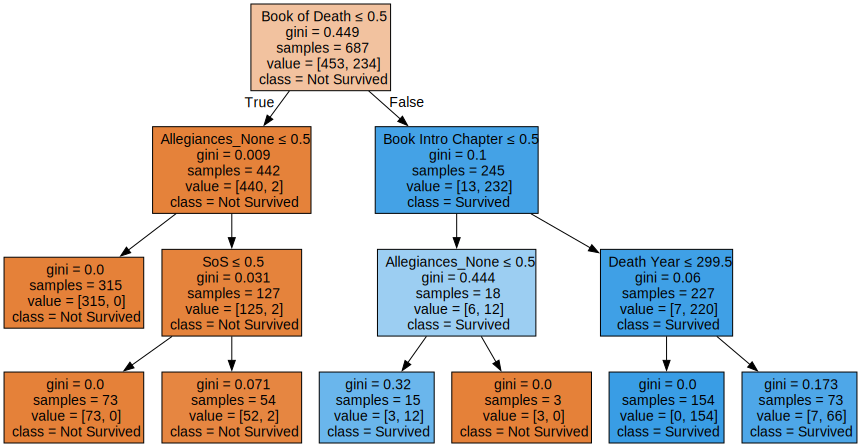

In [11]:
# 5. Produces the decision tree
feature_names = x_train.columns.tolist()
g = export_graphviz(clf, out_file=None, feature_names=feature_names,
                    class_names=['Not Survived', 'Survived'],
                    filled=True, special_characters=True)
# use graph to draw g
graph = graphviz.Source(g)
graph.view()
graph

In [12]:
# submits
submit = pd.DataFrame({"Character": x_test.index, "Death": predictions})
submit.to_csv("D:\submission.csv", index=False)